In [41]:
%matplotlib inline
from __future__ import division
import numpy
import gzip
import pickle
import math

In [8]:
with gzip.open('mnist.pkl.gz', 'r') as f:
    mnist = pickle.load(f)
    training, validation, test = mnist

In [66]:
print len(training[0])
len(training[0][1])
training[1][2]
len(validation[0])
len(test[0])

50000


10000

(784,)


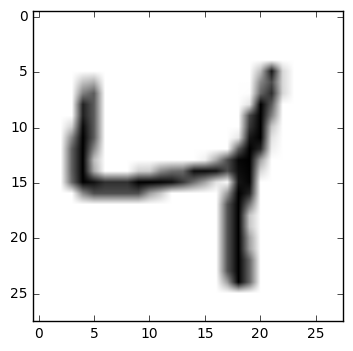

In [10]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

def pictify(array):
    arr = numpy.reshape(array, (28,28))
    plt.imshow(arr, cmap="gray_r")
    plt.show()
print training[0][1].shape
pictify(training[0][2])

In [11]:
# find avg darkness

counts = [0 for i in range(0, 10)]
darksum = [0 for i in range(0,10)]

for i in range(len(training[0])):
    counts[training[1][i]] += 1
    darksum[training[1][i]] += sum(training[0][i])

for i in range(0, 10):
    darksum[i] = darksum[i] / counts[i]

print darksum

[135.8691200324412, 59.660347503522367, 116.29430385718599, 110.87092451235051, 95.220739703385476, 100.34646166222814, 107.38312020298929, 89.878834541062801, 117.88056410703221, 96.045558559292303]


In [13]:
correct = 0

eachVal = [0 for i in range(0,10)]
eachCorr = [0 for i in range(0, 10)]

for t in range(len(test[0])):
    sumtest = sum(test[0][t])
    x = min(range(10), key=lambda y: abs(darksum[y] - sumtest))
    eachVal[test[1][t]] += 1
    if x == test[1][t]:
        correct += 1
        eachCorr[test[1][t]] += 1

print correct * 1.0 / len(test[0])

for x in range(len(eachVal)):
    print x
    print eachCorr[x] * 1.0 / eachVal[x]

0.2225
0
0.541836734694
1
0.829074889868
2
0.0484496124031
3
0.0485148514851
4
0.0488798370672
5
0.0795964125561
6
0.0657620041754
7
0.287937743191
8
0.136550308008
9
0.0426164519326


In [137]:
class WTFUW: #whatever the fuck u want
    def evaluate(self, testdata, labels):
        cnt = 0
        # return num cases correct
        confu_m = numpy.zeros((10,10), dtype=numpy.uint32)
        correct = 0
        from collections import Counter
        c = Counter()
        for data, label in zip(testdata, labels):
            x = self.classify(data)
            if x == label:
                correct += 1
            confu_m[int(x)][int(label)] += 1 # [yours] [true]
        return correct * 1.0 / len(testdata), confu_m
        #return sum(int(self.classify(data) == label) for data, label in zip(testdata, labels)) / len(testdata)

In [125]:
class AvgDarkness(WTFUW):
    
    def __init__(self):
        self.avgDarkness = [0 for i in range(0,10)]
    
    def train(self, trainingData, label):
        counts = [0 for i in range(0, 10)]
        darksum = [0 for i in range(0,10)]

        for i in range(len(trainingData)):
            counts[label[i]] += 1
            darksum[label[i]] += sum(trainingData[i])

        for i in range(0, 10):
            darksum[i] = darksum[i] / counts[i]
        
        self.avgDarkness = darksum
        
    
    def classify(self, oneTestData):
        return min(range(10), key=lambda y: abs(self.avgDarkness[y] - sum(oneTestData)))
        

In [144]:
# training of pixels on in each place


class DoperBaes(WTFUW):
    
    def __init__(self):
        self.pixelidig = [numpy.zeros(784) for i in range(0,10)]
        self.counts = [0 for i in range(0,10)]
    
    def train(self, trainingData, labels):
        
        for data, label in zip(trainingData, labels):
            binary_arr = data > 0.5
            self.pixelidig[label] += binary_arr
            self.counts[label] += 1

        for index, (pixel, num) in enumerate(zip(self.pixelidig, self.counts)):
            self.pixelidig[index] = (pixel + 1) * 1.0 / (num + 2)
            # la place smoothing
        pictify(self.pixelidig[8])
    
    def classify(self, oneTestData):
        num = [0 for i in range(0,10)]
        for i in range(0,10):
            mew = oneTestData > 0.5
            """
            gr = 0
            for pix, prob in zip(mew, self.pixelidig[i]):
                if pix:
                    gr += math.log(prob)
                else:
                    gr += math.log(1 - prob)
            num[i] = gr
            """
            num[i] = sum(mew*numpy.log(self.pixelidig[i])) + sum((1-mew)*numpy.log(1-self.pixelidig[i]))
        return max(range(10), key=lambda x:num[x])

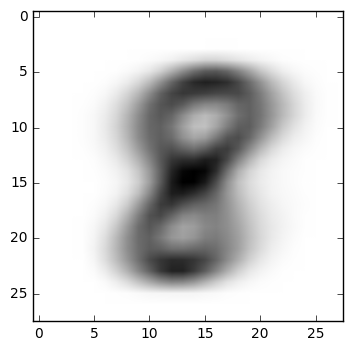

In [146]:
rawr = DoperBaes()
rawr.train(training[0], training[1])
acc, confu = rawr.evaluate(test[0], test[1])

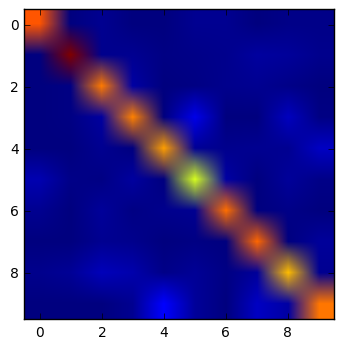

In [152]:
plt.imshow(confu)